## Deep Learning Intro - Sigmoid Functions



In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np

In [ ]:
X = np.linspace(-10, 10, 100)

In [ ]:
ws = [0.5, 1, 2, 100]

In [ ]:
import matplotlib.pyplot as plt

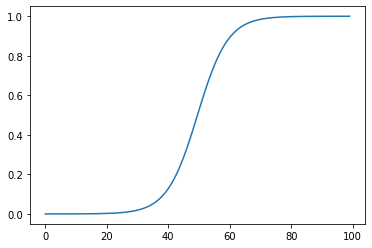

In [ ]:
sigX = 1/(1+np.exp(-X))
plt.plot(sigX)

In [ ]:
import scipy


In [ ]:
scipy.log(999)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  """Entry point for launching an IPython kernel.


6.906754778648554

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Text(0.5, 1.0, 'Sigmoid without bias')

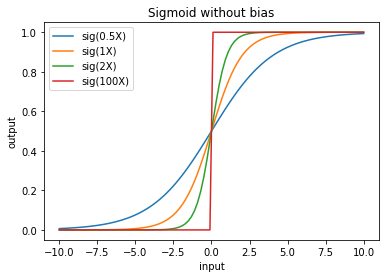

In [ ]:
for w in ws:
   sigX = 1/(1+np.exp(-w*X))
   plt.plot(X, sigX)
plt.xlabel('input')
plt.ylabel('output')
plt.legend([f'sig({w}X)' for w in ws])
plt.title("Sigmoid without bias")

In [ ]:
biases = np.ones(len(X))
wb = [-6, -4, 0, 4, 6]

Text(0.5, 1.0, 'Sigmoid with bias')

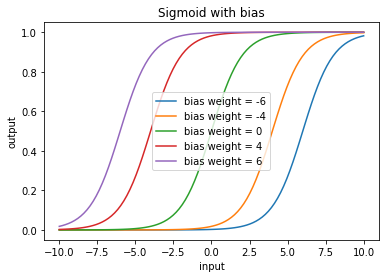

In [ ]:
biases = np.ones(len(X))
wb = [-6, -4, 0, 4, 6]
for w in wb:
   sigX = 1/(1+np.exp(-(X+w*biases)))
   plt.plot(X, sigX)
plt.xlabel('input')
plt.ylabel('output')
plt.legend([f'bias weight = {w}' for w in wb])
plt.title("Sigmoid with bias")

## The cannonical XOR problem

In [ ]:
import tensorflow as tf

In [ ]:
inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
targets = [[0], [1], [1], [0]]

[]

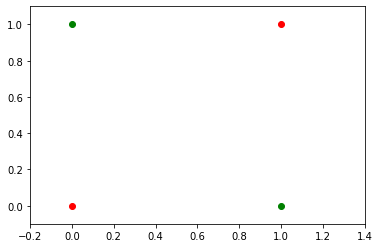

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="g")
ax.scatter(1, 0, color="g")
ax.scatter(1, 1, color="r")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
plt.plot()

In [ ]:
## Learning for XOR

In [ ]:
import numpy as np 
#np.random.seed(0)

def sigmoid (x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

#Input datasets
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])

epochs = 100000
lr = 0.4
inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1

#Random weights and bias initialization
hidden_weights = np.random.uniform(size=(inputLayerNeurons,hiddenLayerNeurons))
hidden_bias =np.random.uniform(size=(1,hiddenLayerNeurons))
output_weights = np.random.uniform(size=(hiddenLayerNeurons,outputLayerNeurons))
output_bias = np.random.uniform(size=(1,outputLayerNeurons))

print("Initial hidden weights: ",end='')
print(*hidden_weights)
print("Initial hidden biases: ",end='')
print(*hidden_bias)
print("Initial output weights: ",end='')
print(*output_weights)
print("Initial output biases: ",end='')
print(*output_bias)


#Training algorithm
for _ in range(epochs):
	#Forward Propagation
	hidden_layer_activation = np.dot(inputs,hidden_weights)
	hidden_layer_activation += hidden_bias
	hidden_layer_output = sigmoid(hidden_layer_activation)

	output_layer_activation = np.dot(hidden_layer_output,output_weights)
	output_layer_activation += output_bias
	predicted_output = sigmoid(output_layer_activation)

	#Backpropagation
	error = expected_output - predicted_output
	d_predicted_output = error * sigmoid_derivative(predicted_output)
	
	error_hidden_layer = d_predicted_output.dot(output_weights.T)
	d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

	#Updating Weights and Biases
	output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
	output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * lr
	hidden_weights += inputs.T.dot(d_hidden_layer) * lr
	hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * lr

print("Final hidden weights: ",end='')
print(*hidden_weights)
print("Final hidden bias: ",end='')
print(*hidden_bias)
print("Final output weights: ",end='')
print(*output_weights)
print("Final output bias: ",end='')
print(*output_bias)

print("\nOutput from neural network after 10,000 epochs: ",end='')
print(*predicted_output)

Initial hidden weights: [0.01787234 0.2971701 ] [0.05506444 0.1110473 ]
Initial hidden biases: [0.06345645 0.51825057]
Initial output weights: [0.38225146] [0.94586787]
Initial output biases: [0.47296567]
Final hidden weights: [5.28138874 7.07521396] [5.28155456 7.07585623]
Final hidden bias: [-8.0915015  -3.22084443]
Final output weights: [-12.34730514] [11.68052815]
Final output bias: [-5.5058143]

Output from neural network after 10,000 epochs: [0.00629812] [0.99468202] [0.99468179] [0.0054259]


## Solving a linear Problem

In [ ]:
import numpy as np

In [ ]:
X = 3 * np.random.rand(50, 1)
y = 5 + 4 * X + np.random.rand(50, 1)

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

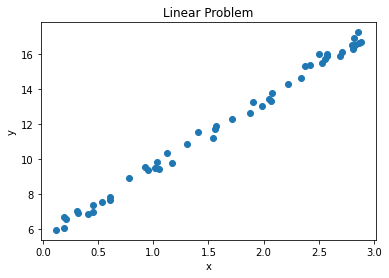

In [ ]:
plt.scatter(X, y)
plt.title("Linear Problem")
plt.xlabel("x")
plt.ylabel("y")

In [ ]:
X_b = np.c_[np.ones((50, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

array([[5.52987479],
       [3.95950972]])

In [ ]:
eta = 0.3 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
 gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
 theta = theta - eta * gradients

In [ ]:
theta

array([[5.52987479],
       [3.95950972]])

## Extra: Hooks to visualize the layers

In [ ]:
import torch
from torchvision.models import resnet34


device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model = resnet34(pretrained=True)
model = model.to(device)

In [ ]:
class SaveOutput:
    def __init__(self):
        self.outputs = []
        
    def __call__(self, module, module_in, module_out):
        self.outputs.append(module_out)
        
    def clear(self):
        self.outputs = []

In [ ]:
[(i+1, layer) for i, layer in enumerate(model.modules()) if isinstance(layer, torch.nn.modules.conv.Conv2d)]

In [ ]:
save_output = SaveOutput()

hook_handles = []

for layer in model.modules():
    if isinstance(layer, torch.nn.modules.conv.Conv2d):
        handle = layer.register_forward_hook(save_output)
        hook_handles.append(handle)

In [ ]:
hook_handles

In [ ]:
! ls

boat.jpg  dog.jpg  sample_data


In [ ]:
from PIL import Image
from torchvision import transforms as T

image = Image.open('dog.jpg')
transform = T.Compose([T.Resize((224, 224)), T.ToTensor()])
X = transform(image).unsqueeze(dim=0).to(device)

out = model(X)

In [ ]:
assert len(save_output.outputs) == 36

In [ ]:
import matplotlib.pyplot as plt

def module_output_to_numpy(tensor):
    return tensor.detach().to('cpu').numpy()    

images = module_output_to_numpy(save_output.outputs[3])

plt.figure(figsize=(20, 20), frameon=False)
for idx in range(16):
    plt.subplot(4, 4, idx+1)
    plt.imshow(images[0, idx])
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

In [ ]:
save_output.outputs[2].shape

torch.Size([1, 64, 56, 56])